# TUTORIAL: LIMPIEZA DE DATOS CON PYTHON Y PANDAS

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [25]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/content/dataset_banco.csv"
data = pd.read_csv(ruta)

Mounted at /gdrive


In [27]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [28]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [38]:
import pandas as pd

# Carga el dataset
data = pd.read_csv("/content/dataset_banco.csv")

# Elimina las filas con valores NaN en las columnas especificadas
data = data.dropna(subset=["job", "marital", "education", "balance", "duration", "pdays"])

# Verifica el número de filas
numero_filas = data.shape[0]

# Calcula el número de valores faltantes en cada columna
valores_nulos_por_columna = data.isnull().sum()

# Imprime el número de valores faltantes por columna
print("Número de valores faltantes por columna:")
print(valores_nulos_por_columna)

# Imprime el DataFrame modificado
print(data)

# Imprime el número de filas
print(f"Número de filas: {numero_filas}")

# Guarda el DataFrame limpio en un nuevo archivo CSV
data.to_csv("/content/dataset_limpio.csv", index=False)


Número de valores faltantes por columna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
2       33  entrepreneur   married  secondary      no      2.0     yes  yes   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45202   51    technician   married   tertiary      no    825.0      no   no   
45203   71       retired  divorced    primary      no   172

In [30]:
import pandas as pd

# Carga el dataset
data_limpio = pd.read_csv("/content/dataset_limpio.csv")

# Verifica qué columnas tienen valores nulos
columnas_con_nulos = data.columns[data.isnull().any()]
print(columnas_con_nulos)

# Elimina todas las filas que contienen valores nulos en las columnas identificadas
data = data.dropna(subset=columnas_con_nulos)



Index([], dtype='object')


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##4.3 Filas repetidas

In [31]:
import pandas as pd

# Carga el dataset
data_limpio = pd.read_csv("/content/dataset_limpio.csv")

# Eliminar las filas duplicadas y conservar solo una de cada una
data_sin_duplicados = data.drop_duplicates()

# Verificar si se eliminaron filas duplicadas y mostrar la cantidad de filas eliminadas
cantidad_duplicados = len(data) - len(data_sin_duplicados)
if cantidad_duplicados > 0:
    print(f"Se eliminaron {cantidad_duplicados} filas duplicadas.")
else:
    print("No se encontraron filas duplicadas.")

Se eliminaron 4 filas duplicadas.


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.


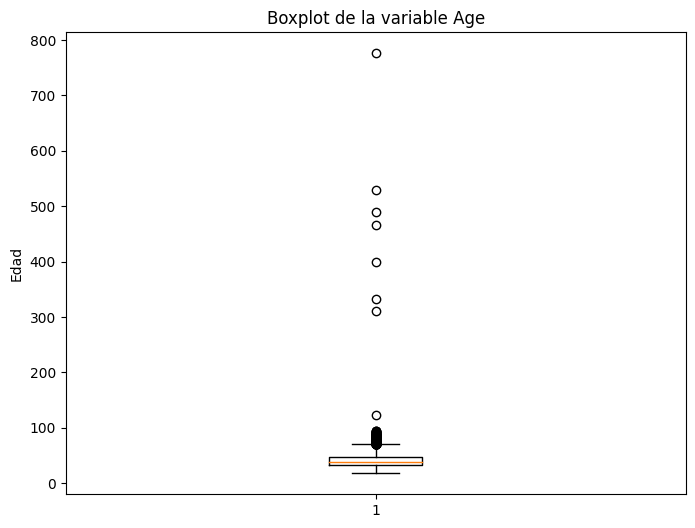

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el dataset
data_limpio = pd.read_csv("/content/dataset_limpio.csv")

# Crea el boxplot de la variable 'age'
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Boxplot de la variable Age')
plt.ylabel('Edad')
plt.show()


In [33]:
import pandas as pd

# Carga el dataset
data_limpio = pd.read_csv("/content/dataset_limpio.csv")

# Cuenta cuántos valores de la variable 'age' están por encima de 100
conteo_age_mas_100 = (data['age'] > 100).sum()

print(f"El número de valores de la variable 'age' por encima de 100 es: {conteo_age_mas_100}")

El número de valores de la variable 'age' por encima de 100 es: 8


Al ser 8 el número de registros que se encuentran por encima de 100, teniendo en cuenta que el número de registros es bastante grande podríamos prescindir de ellos y eliminarlos ya que no afectaría prácticamente.

In [34]:
# Carga el dataset
data_limpio = pd.read_csv("/content/dataset_limpio.csv")

# Filtra los registros donde la variable 'age' sea menor o igual a 100
data_filtrado = data[data['age'] <= 100]

##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [35]:
import pandas as pd

def convertir_y_reemplazar_columna(data, columna, valores_a_reemplazar):
    data[columna] = data[columna].str.lower()
    data[columna] = data[columna].replace(valores_a_reemplazar)

# Carga el dataset
data_limpio = pd.read_csv("/content/dataset_limpio.csv")

# Reemplaza "UNK" por "unknown" en todo el DataFrame
data.replace("UNK", "unknown", inplace=True)

# Define los valores a reemplazar para cada columna
valores_a_reemplazar = {
    "job": {"admin.": "administrative"},
    "marital": {"div.": "divorced"},
    "education": {"sec.": "secondary"},
    "contact": {"cellular": "mobile", "telephone": "mobile", "phone": "mobile"},
    "poutcome": {"success"}
}

# Aplica las transformaciones utilizando la función definida
for columna, reemplazos in valores_a_reemplazar.items():
    convertir_y_reemplazar_columna(data, columna, reemplazos)

# Obtiene y imprime los valores únicos de todas las columnas transformadas
columnas_a_imprimir = ["job", "marital", "education", "contact", "poutcome"]
for columna in columnas_a_imprimir:
    valores_unicos = data[columna].unique()
    print(f"Valores únicos de la columna '{columna}':")
    for valor in valores_unicos:
        print(valor)


Valores únicos de la columna 'job':
management
technician
entrepreneur
blue-collar
unknown
retired
administrative
services
self-employed
unemployed
housemaid
student
Valores únicos de la columna 'marital':
married
single
divorced
Valores únicos de la columna 'education':
tertiary
secondary
unknown
primary
Valores únicos de la columna 'contact':
unknown
mobile
Valores únicos de la columna 'poutcome':
unknown
failure
other
success


In [36]:
import pandas as pd

# Carga el dataset limpiado

data_limpio = pd.read_csv("/content/dataset_limpio.csv")

# Obtiene el número total de registros
numero_total_registros = data_limpio.shape[0]

print(f"El número total de registros después de la limpieza del CSV es: {numero_total_registros}")



El número total de registros después de la limpieza del CSV es: 45207


## Conclusiones

La presencia de valores faltantes en los datos puede afectar significativamente el análisis; en este caso,por ser tan pocos los datos
faltantes hemos optado por eliminar las filas correspondientes.

Por otra parte, la eliminación de filas duplicadas es un paso que puede ayudar a garantizar la calidad y la integridad de los datos; en nuestro caso se han eliminado 4 filas duplicadas, en el caso que fueran más podría causar una diferencia significativa a la hora de procesar e interpretar los datos, facilitando de esta manera el análisis de nuestros datos.

En cuanto a outliers en la variable 'age', al ser 8 el número de registros que se encuentran por encima de 100, teniendo en cuenta que el número de registros es bastante grande podríamos prescindir de ellos y eliminarlos ya que no afectaría prácticamente.

Para continuar con la mejora de la consistencia y la calidad de los datos, continuamos con los errores tipográficos en variables categóricas. Esto implica convertir todas las letras a minúsculas y reemplazar valores específicos por otros más uniformes, como es el caso de "UNK" que se reemplaza por "unknown", y se aplican otros cambios en valores específicos de algunas columnas.

In [37]:
data.to_csv(ruta, index=False)